<a href="https://colab.research.google.com/github/hebamuh68/Machine-Learning-Specialization/blob/main/Neural_network/NN_3_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# **Load The Dataset**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist


In [ ]:
# Seprate the data into test and train using load_data()
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

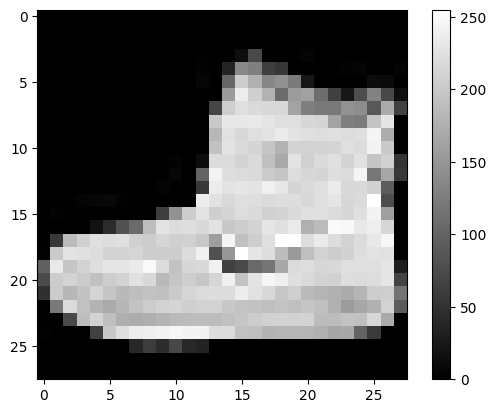

In [ ]:
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Normalisation
train_images = tf.keras.utils.normalize(train_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)

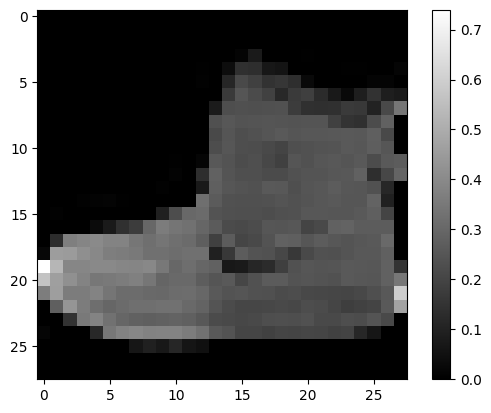

In [ ]:
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

# **Build the NN**

In [ ]:
# The one line build method, same as using model.add()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# We decide the optimizer to reach the optimal solution, best graident descent rn is adam
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Train The Model**

In [ ]:
 # less epochs means UF , more epochs means OF
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7655 - loss: 0.6681
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8623 - loss: 0.3775
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8796 - loss: 0.3332
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8843 - loss: 0.3117
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8929 - loss: 0.2884


In [ ]:
val_loss, val_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8759 - loss: 0.3357


In [ ]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[4.5831234e-07 4.1697644e-12 7.8429238e-08 1.0017243e-06 5.6835514e-09
 1.2362127e-03 2.1865110e-06 4.4929101e-03 9.2552646e-06 9.9425793e-01]
9
9


# **Visulaization Results**

In [ ]:
# i: index of the image to be plotted
# predictions_array: array of prediction probabilities for all images
# true_label: array of true labels for all images
# img: array of test images
def plot_image(i, predictions_array, true_label, img):
    # Extract the prediction, true label, and image for the ith image
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    # Turn off the grid and ticks for the plot
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Display the image in binary color map (black and white)
    plt.imshow(img, cmap=plt.cm.binary)

    # Determine the predicted label (the class with the highest probability)
    predicted_label = np.argmax(predictions_array)

    # If the prediction is correct, use blue color; otherwise, use red color
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    # Set the xlabel with the predicted class name, prediction confidence, and true class name
    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],  # Predicted class name
            100 * np.max(predictions_array),  # Confidence of the prediction
            class_names[true_label]  # True class name
        ),
        color=color
    )

In [ ]:
# i: index of the image to be plotted
# predictions_array: array of prediction probabilities for all images
# true_label: array of true labels for all images
def plot_value_array(i, predictions_array, true_label):
    # Extract the prediction and true label for the ith image
    predictions_array, true_label = predictions_array[i], true_label[i]

    # Turn off the grid and ticks for the plot
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Create a bar plot of the prediction probabilities
    thisplot = plt.bar(range(len(predictions_array)), predictions_array, color="#777777")

    # Determine the predicted label (the class with the highest probability)
    predicted_label = np.argmax(predictions_array)

    # Highlight the predicted label with red color
    thisplot[predicted_label].set_color('red')

    # Highlight the true label with blue color
    thisplot[true_label].set_color('blue')

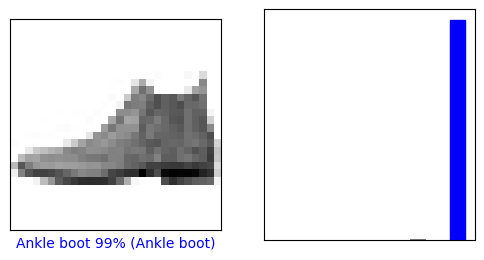

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

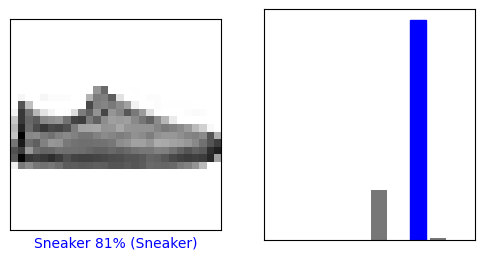

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

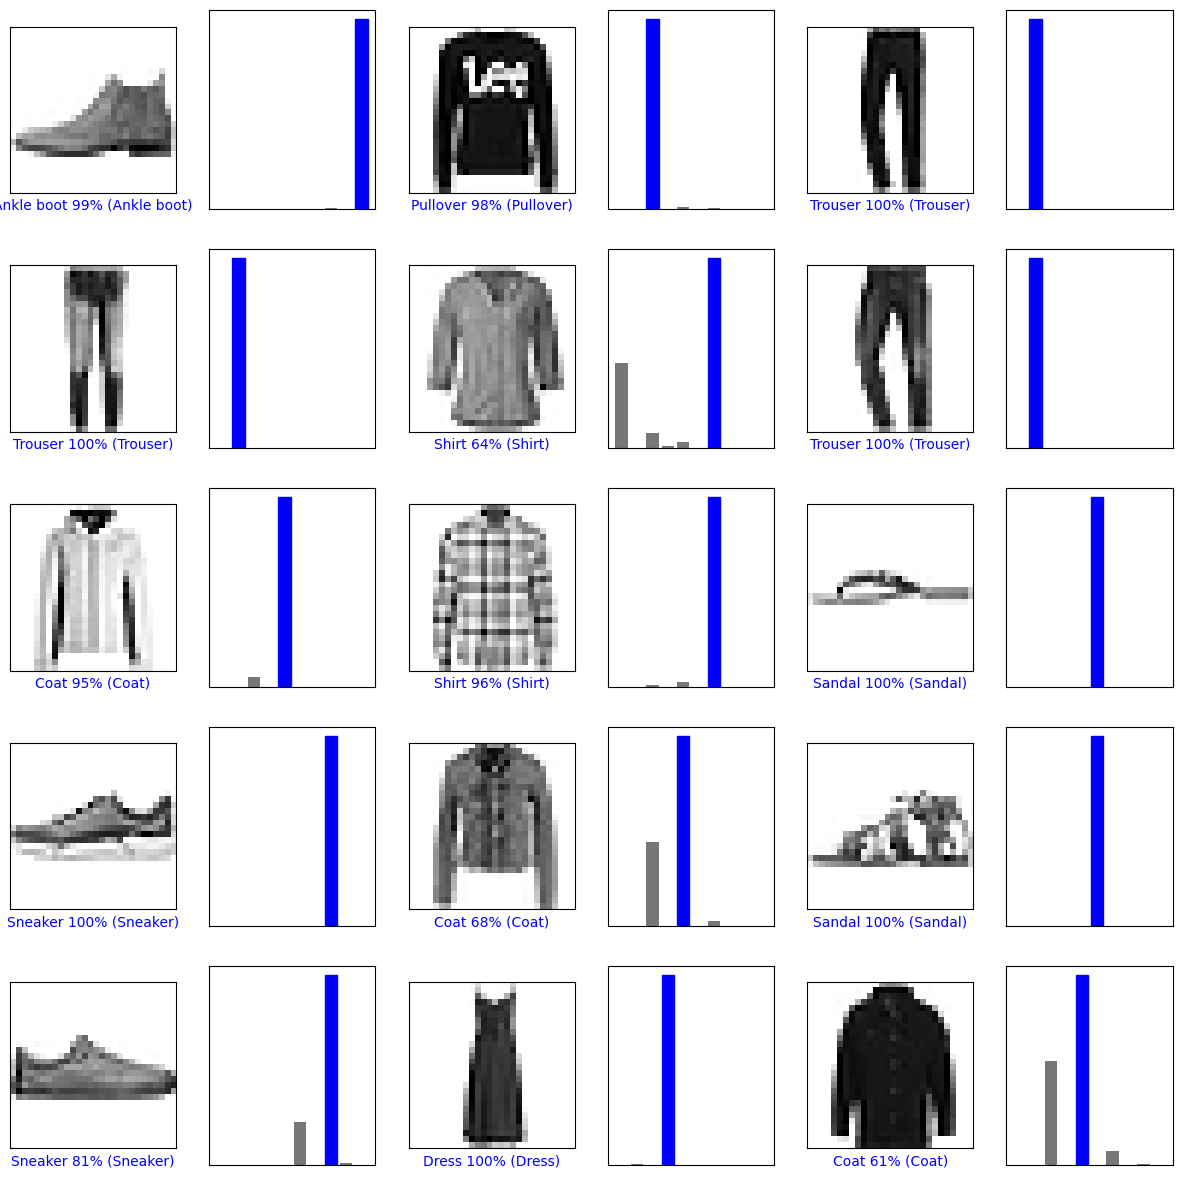

In [ ]:
plt.figure(figsize=(15,15))
for i in range(num_images):
  plt.subplot(5, 6, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(5, 6, 2*i+2)
  plot_value_array(i, predictions, test_labels)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


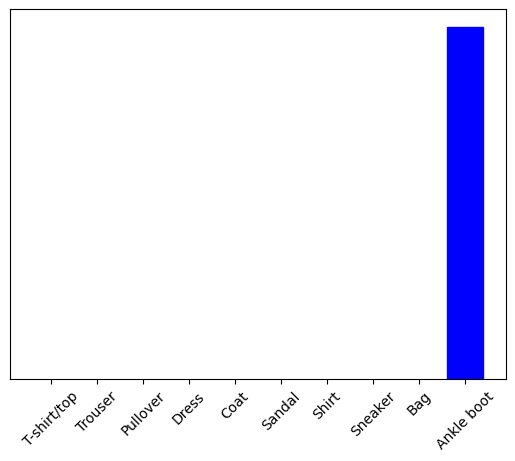

In [ ]:
# Grab an image from the test dataset
img = test_images[0]

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

predictions_single = model.predict(img)
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
